<a href="https://colab.research.google.com/github/RifatxRahman/OCR-/blob/main/image%20segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

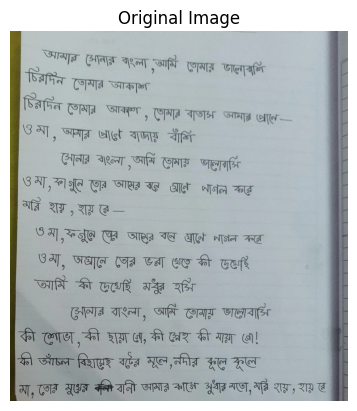

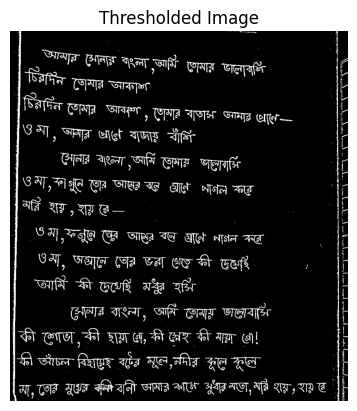

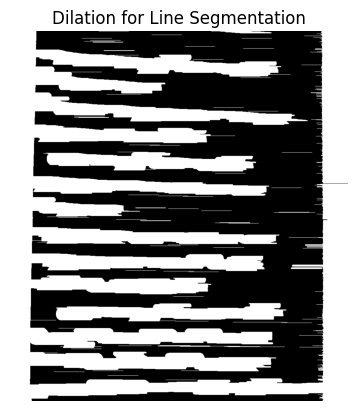

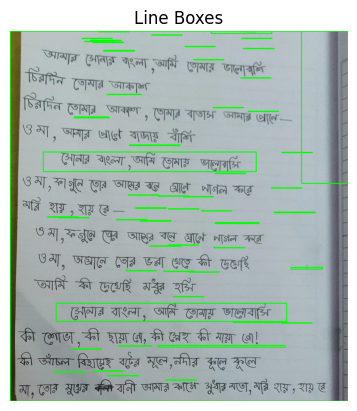

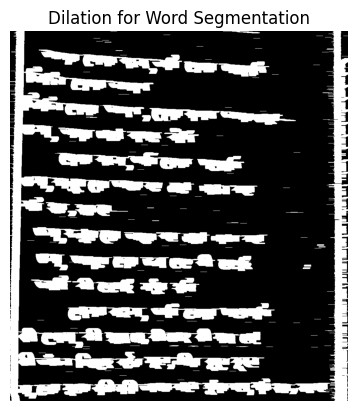

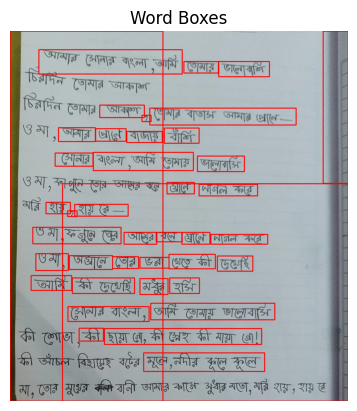

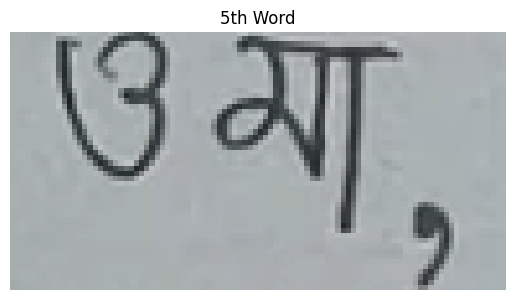

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and resize image
img = cv2.imread('/content/my-bengali-handwriting-how-can-i-improve-it-v0-g12rjvltpzl81.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape
if w > 1000:
    new_w = 1000
    ar = w / h
    new_h = int(new_w / ar)
    img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 2: Thresholding
def thresholding(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 25, 10)
    plt.imshow(thresh, cmap='gray')
    plt.title('Thresholded Image')
    plt.axis('off')
    plt.show()
    return thresh

thresh_img = thresholding(img)

# Step 3: Dilation for Line Segmentation
kernel_line = np.ones((1, 90), np.uint8)
dilated_lines = cv2.dilate(thresh_img, kernel_line, iterations=1)
plt.imshow(dilated_lines, cmap='gray')
plt.title('Dilation for Line Segmentation')
plt.axis('off')
plt.show()

# Step 4: Find Line Contours
(contours, _) = cv2.findContours(dilated_lines.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_line_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[1])

# Step 5: Draw Line Boxes
img_lines = img.copy()
for ctr in sorted_line_contours:
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(img_lines, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(img_lines)
plt.title('Line Boxes')
plt.axis('off')
plt.show()

# Step 6: Dilation for Word Segmentation
kernel_word = np.ones((1, 20), np.uint8)  # Fixed: word kernel
dilated_words = cv2.dilate(thresh_img, kernel_word, iterations=1)
plt.imshow(dilated_words, cmap='gray')
plt.title('Dilation for Word Segmentation')
plt.axis('off')
plt.show()

# Step 7: Word Detection
img_words = img.copy()
words_list = []

for line in sorted_line_contours:
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated_words[y:y+h, x:x+w]

    (cnt, _) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_word_contours = sorted(cnt, key=lambda ctr: cv2.boundingRect(ctr)[0])

    for word in sorted_word_contours:
        if cv2.contourArea(word) < 300:
            continue
        x2, y2, w2, h2 = cv2.boundingRect(word)
        abs_coords = [x + x2, y + y2, x + x2 + w2, y + y2 + h2]
        words_list.append(abs_coords)
        cv2.rectangle(img_words, (abs_coords[0], abs_coords[1]), (abs_coords[2], abs_coords[3]), (255, 0, 0), 2)

plt.imshow(img_words)
plt.title('Word Boxes')
plt.axis('off')
plt.show()

# Step 8: Crop 5th word
if len(words_list) > 4:
    x1, y1, x2, y2 = words_list[4]
    roi_word = img[y1:y2, x1:x2]
    plt.imshow(roi_word)
    plt.title('5th Word')
    plt.axis('off')
    plt.show()
else:
    print("Less than 5 words found.")
